<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/Eq_onda_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Método pseudoespectral a qeuação da onda em 1 dimensão


# tpsi + colpsi = 0;  unidimensional


N = 300

L0 = 10

col = np.cos(np.arange(N)*math.pi / (N-1))     # pontos de colocação
x = L0 * np.arctanh(col)                   # mapeamento   

xcol = (1 - np.tanh(x/L0)**2)/L0              # dcol/dx


# Matriz base (Polinômios de Tchebyshev):

T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])


T[0,] = 1
T[1,] = col

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

colT[0,] = 0
colT[1,] = 1

xT[0,] = xcol*colT[0,]
xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]

xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx


psi = T[0:N,:]   
xpsi = xT[0:N,:]


# Condicoes iniciais

u = (0.3)**(1/2)


f_0 = np.exp(-(x**2)/(u**2))              # dado inicial da  equação da onda



inv_psi = np.linalg.inv(psi)
  

a0 = np.dot(f_0, inv_psi)  # coeficientes a(0)

phi = np.dot(a0, psi)      # solução exata em t=0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


In [46]:
# Plot: Condições Iniciais

M = 3000

xplot = np.linspace(-30,30,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 


f_plot0 = np.exp(-((xplot)**2)/(u)**2)    

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)

np.shape(f_plot0)

(3000,)

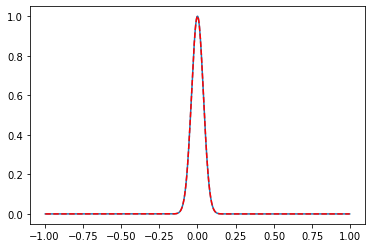

In [18]:
plt.plot(colplot, phiplot, colplot, f_plot0, "--r")

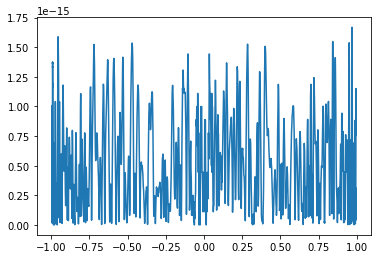

In [19]:
plt.plot(colplot, erro)

In [47]:
h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It + 1)

phi_set = np.zeros([It,M])

#phi0_set = np.zeros([0,It])

#f_colisao = -1 + f_k - f_antik                   # solução da colisão do kink e antikink



for i in range(It):  # Runge Kutta 4th order

  da = np.dot(- np.dot(a0, xpsi), inv_psi) 
  K1 = h*(da)

  da = np.dot(- np.dot(a0 + K1/2, xpsi), inv_psi) 
  K2 = h*(da)

  da = np.dot(- np.dot(a0 + K2/2, xpsi), inv_psi)  
  K3 = h*(da)

  da = np.dot(- np.dot(a0 + K3, xpsi), inv_psi) 
  K4 = h*(da)
  
  a0 = a0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set[i,:] = np.dot(a0, psiplot)

array([-4.00464124e-19, -3.24451135e-35,  4.00464124e-19,  5.51894598e-36,
        1.10834424e-34,  3.41642739e-35, -1.17580292e-34, -6.34678787e-35,
        2.57127634e-34, -1.72705099e-34,  5.85690060e-35, -2.81560284e-35,
       -7.90843212e-35, -8.10033157e-35,  1.42851951e-35, -8.49515074e-35,
       -1.00122731e-34,  1.32745638e-34,  9.34224135e-36, -3.96597100e-35,
       -1.24010246e-34,  2.10002066e-35, -2.55978589e-35,  8.20641994e-36,
       -1.16741283e-36,  1.81094456e-34, -6.97751406e-35, -6.44222332e-35,
       -2.43275903e-35, -8.95403434e-35,  1.33616973e-35,  4.35821877e-35,
        5.37862134e-36, -7.02783991e-35, -6.40666462e-35, -4.18049872e-35,
        1.24925662e-34, -1.90175884e-34, -1.30604769e-35, -1.72430328e-36,
       -1.00365912e-34,  6.24848716e-36, -2.04543364e-35, -3.56149074e-35,
        4.66965131e-36,  6.00060479e-35,  8.66765453e-35, -3.82351578e-35,
       -7.11394487e-35,  1.06796601e-34,  4.51154732e-35,  5.05339511e-35,
        1.20580006e-35, -

(0.0, 1.0)

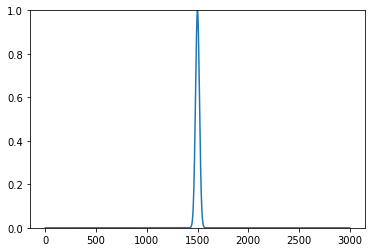

In [25]:
plt.plot(phi_set[i,:])
plt.ylim((0, 1))


In [15]:
tplot = np.arange(101)

#plt.plot(tplot, phi_set[i])


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])